<a href="https://colab.research.google.com/github/Tinonturja/Deep-Learning-with-PyTorch/blob/main/Non_Linearity(Binary_and_MultiClass_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Recreating non-linear data(red and blue circles)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn

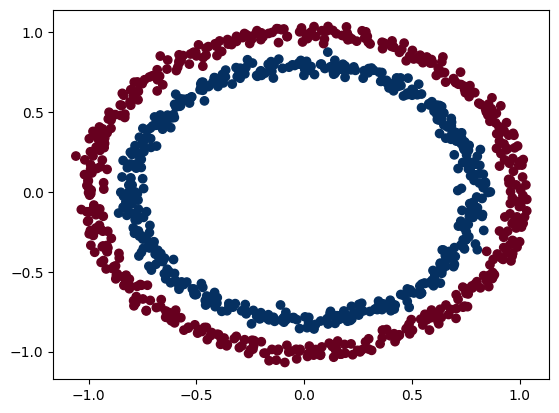

In [2]:
#make and plot data
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0],
            X[:,1],
            c = y,
            cmap = plt.cm.RdBu)

In [3]:
## Convert Data to Tensors and then to train and test splits
from sklearn.model_selection import train_test_split

#convert data to tensors
X = torch.tensor(X,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.float32)
X.dtype, y.dtype


#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#view the shape
print(f"X_train shape: {X_train.shape} | X_train: \n{X_train[:5]}")
print(f"y_train shape: {y_train.shape} | y_train: \n{y_train[:5]}")
print(f"X_test shape: {X_test.shape} | X_test: \n{X_test[:5]}")
print(f"y_test shape: {y_test.shape} | y_test: \n{y_test[:5]}")


X_train shape: torch.Size([800, 2]) | X_train: 
tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])
y_train shape: torch.Size([800]) | y_train: 
tensor([1., 0., 0., 0., 1.])
X_test shape: torch.Size([200, 2]) | X_test: 
tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]])
y_test shape: torch.Size([200]) | y_test: 
tensor([1., 0., 1., 0., 1.])


## Building a Model with Non-Linearity

In [4]:
# build a model
import torch.nn as nn

class ClassificationModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,
                            out_features=10)
    self.layer2 = nn.Linear(in_features=10,
                            out_features=10)
    self.layer3 = nn.Linear(in_features=10,
                            out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [5]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
#if cuda is setting up then you can be set up as
# model_3 = ClassificationModelv2().to(device)
model_3 = ClassificationModelv2()
model_3.to(device)

ClassificationModelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [26]:
#accuracy calculation
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() #y_true and y_pred must be the same size, positional value check
  acc = ((correct)/len(y_pred)) * 100
  return acc

In [8]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

#optimizer set up
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

## Training a model with non linearity

In [9]:
torch.manual_seed(42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

epochs = 5000
for epoch in range(epochs):
  model_3.train()
  train_pred = model_3(X_train.squeeze()).squeeze()
  train_labels = torch.round(torch.sigmoid(train_pred.squeeze()))
  train_accuracy = accuracy_fn(y_train,train_labels)
  train_loss = loss_fn(train_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test.squeeze()).squeeze()
    test_labels = torch.round(torch.sigmoid(test_pred.squeeze()))
    test_accuracy = accuracy_fn(y_test,test_labels)
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train_loss: {train_loss} | Train_Accuracy:{train_accuracy} | Test_loss: {test_loss} | Test_accuracy: {test_accuracy}")

Epoch: 0 | Train_loss: 0.6983016133308411 | Train_Accuracy:50.0 | Test_loss: 0.6980812549591064 | Test_accuracy: 50.0
Epoch: 10 | Train_loss: 0.6933295726776123 | Train_Accuracy:50.0 | Test_loss: 0.6932246685028076 | Test_accuracy: 50.0
Epoch: 20 | Train_loss: 0.6914663910865784 | Train_Accuracy:50.0 | Test_loss: 0.691394031047821 | Test_accuracy: 50.0
Epoch: 30 | Train_loss: 0.6905235052108765 | Train_Accuracy:50.0 | Test_loss: 0.6905378699302673 | Test_accuracy: 50.0
Epoch: 40 | Train_loss: 0.6896318197250366 | Train_Accuracy:50.74999999999999 | Test_loss: 0.6897555589675903 | Test_accuracy: 50.5
Epoch: 50 | Train_loss: 0.6884468197822571 | Train_Accuracy:52.0 | Test_loss: 0.6888659596443176 | Test_accuracy: 50.5
Epoch: 60 | Train_loss: 0.6878781318664551 | Train_Accuracy:52.5 | Test_loss: 0.6885221600532532 | Test_accuracy: 51.0
Epoch: 70 | Train_loss: 0.6873977780342102 | Train_Accuracy:52.87500000000001 | Test_loss: 0.6882737874984741 | Test_accuracy: 51.0
Epoch: 80 | Train_loss: 

In [36]:
## Visualization
##import the file
import requests
from pathlib import Path

#download helper_functions.py file
if Path('helper_functions.py').is_file():
  print('Helper functions already exists')
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open(file="helper_functions.py",mode='wb') as f:
    f.write(request.content)


Helper functions already exists


In [37]:
from helper_functions import plot_predictions, plot_decision_boundary

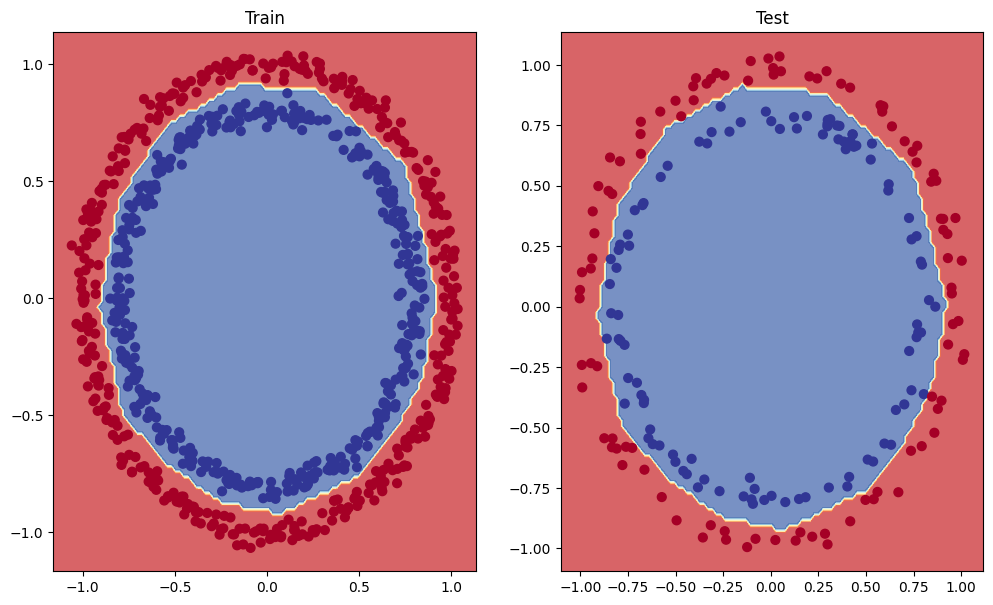

In [12]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [13]:
X_train.device,X_test.device,y_train.device,y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

In [14]:
model_3.to(device)

ClassificationModelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4149,  1.5172],
                      [-1.1635, -1.7417],
                      [ 0.8410, -2.8134],
                      [-0.2669,  0.4904],
                      [-0.1632,  0.1462],
                      [ 2.5262, -0.7703],
                      [-2.4323, -0.9531],
                      [-2.6710, -0.9997],
                      [-0.1893,  0.3353],
                      [-0.9511,  2.6287]])),
             ('layer1.bias',
              tensor([ 1.5279,  2.3606, -0.7517, -0.6811,  0.7193, -0.0192,  0.5101, -0.7233,
                       0.8252, -0.7757])),
             ('layer2.weight',
              tensor([[-0.0146, -0.4478,  0.4270,  0.0748, -0.2662,  0.8663,  0.7485,  0.5811,
                       -0.0480,  0.8442],
                      [ 0.0384, -1.2585,  1.7159,  0.1373, -0.2264,  1.4615,  1.4214,  1.3912,
                       -0.5376,  1.7125],
                      [-0.1852,  0.0130,  0.0406,  0.1172,  0.2049, -0.2016

## Replicating Non Linear Activation Funcitons

Neural Network, rather than telling us what to learn, we give it the tools to discover patterns in data
and find the patterns on its own

And these tools are linear and non_linear funcitons

In [16]:
# create a tensor
A = torch.arange(-10,10,1.00)


In [17]:
A.dtype

torch.float32

In [18]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

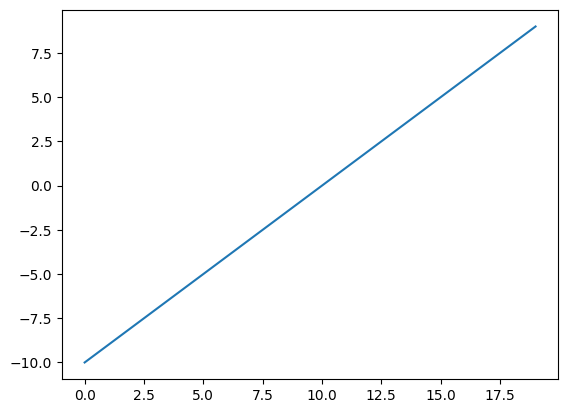

In [19]:
#visualize the data
plt.plot(A)

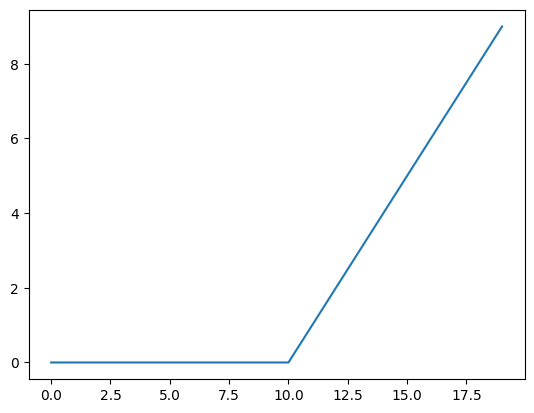

In [20]:
plt.plot(torch.relu(A))

In [21]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [22]:
rLU = relu(A)

In [23]:
rLU

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [24]:
#sigmoid function
def sigmoid(x:torch.tensor):
  return 1/(1+torch.exp(-x))

In [25]:
sigmoid = sigmoid(A)

In [26]:
sigmoid

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

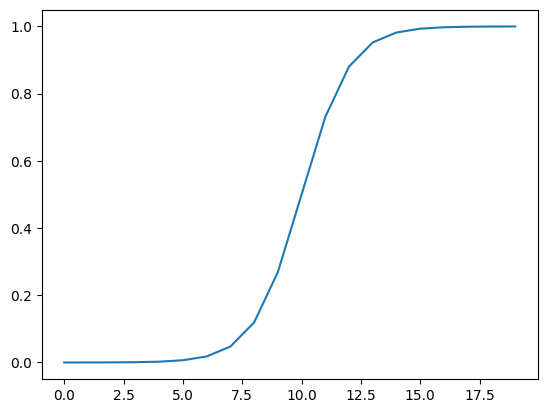

In [27]:
plt.plot(sigmoid)

In [28]:
import numpy as np
X,y = np.meshgrid(torch.arange(-10,10,1),torch.arange(-10,10,1))

In [29]:
X.shape,y.shape

((20, 20), (20, 20))

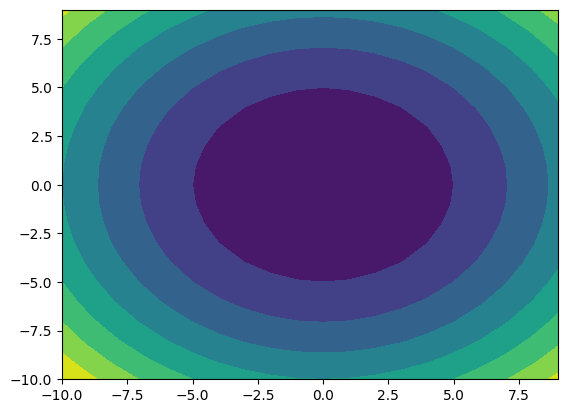

In [30]:
Z = X**2 + y**2  # A function over the grid
plt.contourf(X, y, Z)
plt.show()


## Putting it all together with a **MultiClass** Problem

In [3]:
from sklearn.datasets import make_blobs

In [5]:
n_samples = 1000
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
X_blob,y_blob = make_blobs(n_samples,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=42)

#set the data into tensors
X_blob = torch.tensor(X_blob,dtype = torch.float)
y_blob = torch.tensor(y_blob,dtype = torch.float32)

#split the dataset
from sklearn.model_selection import train_test_split
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=42)


#view the shape
#view the shape
print(f"X_train shape: {X_blob_train.shape} | X_train: \n{X_blob_train[:5]}")
print(f"y_train shape: {y_blob_train.shape} | y_train: \n{y_blob_train[:5]}")
print(f"X_test shape: {X_blob_test.shape} | X_test: \n{X_blob_test[:5]}")
print(f"y_test shape: {y_blob_test.shape} | y_test: \n{y_blob_test[:5]}")


X_train shape: torch.Size([800, 2]) | X_train: 
tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]])
y_train shape: torch.Size([800]) | y_train: 
tensor([1., 0., 2., 2., 0.])
X_test shape: torch.Size([200, 2]) | X_test: 
tensor([[ 4.6675,  4.4878],
        [-7.9969,  6.8803],
        [-6.2801, -7.8571],
        [ 3.6833,  1.1767],
        [-0.1404, 10.1654]])
y_test shape: torch.Size([200]) | y_test: 
tensor([1., 3., 2., 1., 0.])


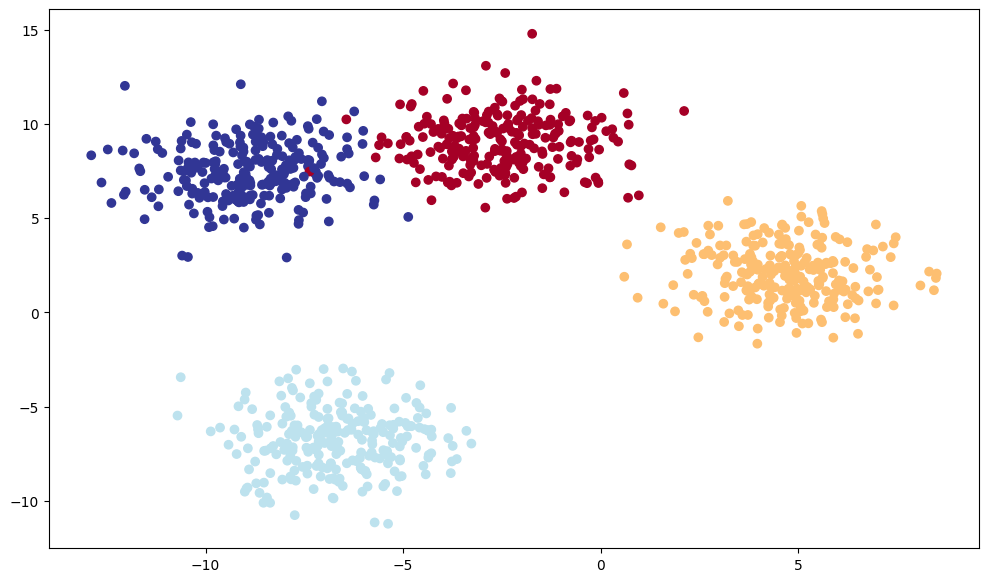

In [6]:
#visualize the data
plt.figure(figsize=(12,7))
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c = y_blob,
            cmap = plt.cm.RdYlBu)

## MultiClass Classification Model

In [7]:
class MultiClassModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_unit = 8):
    super().__init__()
    #we have to use softmax and cross entropy loss
    self.l1 = nn.Linear(in_features=2,
                        out_features=10)
    self.l2 = nn.Linear(in_features=10,
                        out_features=20)
    self.l3 = nn.Linear(in_features=20,
                        out_features=4)
    self.ReLU = nn.ReLU()

  def forward(self,x:torch.tensor):
    return self.l3(self.ReLU(self.l2(self.ReLU(self.l1(x)))))


In [8]:
multiclassmodel = MultiClassModel(input_features=2,output_features=4)

In [9]:
multiclassmodel.state_dict()

OrderedDict([('l1.weight',
              tensor([[ 0.6507, -0.5768],
                      [-0.5905,  0.2360],
                      [ 0.0746,  0.4650],
                      [ 0.7011, -0.4252],
                      [-0.1662, -0.5713],
                      [ 0.6429,  0.3775],
                      [ 0.3425,  0.1798],
                      [ 0.2654,  0.5401],
                      [-0.6189,  0.4533],
                      [-0.1300,  0.6556]])),
             ('l1.bias',
              tensor([-0.4965,  0.0541,  0.0111,  0.3601,  0.6378,  0.0390,  0.6972,  0.1474,
                      -0.4565, -0.4569])),
             ('l2.weight',
              tensor([[-0.2737, -0.1614,  0.0808,  0.0780, -0.1406,  0.1538, -0.0577, -0.1394,
                       -0.1132,  0.1432],
                      [-0.1675,  0.1860, -0.2148, -0.1432, -0.0532, -0.0955, -0.2333,  0.2046,
                       -0.0512, -0.2578],
                      [-0.2702,  0.0190, -0.2236,  0.1008,  0.0314, -0.1366, -0.0951,  

In [11]:
##Getting prediction from multiclass model
with torch.inference_mode():
  y_pred = multiclassmodel(X_blob_test)
y_pred


tensor([[-0.0178, -0.5337, -0.7275,  1.3217],
        [-0.2807,  0.6867,  0.4040,  0.7754],
        [ 1.2677, -0.2036,  0.2807,  0.3338],
        [ 0.0580, -0.2241, -0.3822,  0.6788],
        [-0.2520, -0.2383, -0.4347,  1.5907],
        [-0.3237,  0.8147,  0.5047,  0.8688],
        [ 0.9613, -0.0149,  0.1729,  0.0878],
        [-0.2957,  0.1331, -0.1075,  1.2717],
        [ 1.4183, -0.1000,  0.4660,  0.1677],
        [-0.2714, -0.0054, -0.2280,  1.3626],
        [-0.3104,  0.3245,  0.0611,  1.0882],
        [-0.0434, -0.5493, -0.8076,  1.4499],
        [-0.2825, -0.1287, -0.3403,  1.5520],
        [-0.3510,  0.0837, -0.1589,  1.5082],
        [-0.3725,  0.0232, -0.2173,  1.6592],
        [-0.3080,  0.6437,  0.3547,  0.8040],
        [-0.2748,  0.6994,  0.4178,  0.7700],
        [ 0.8241, -0.0290,  0.2652,  0.1428],
        [-0.4173,  0.8287,  0.4826,  1.0068],
        [-0.1380,  0.6067,  0.3778,  0.5512],
        [-0.3975,  0.7310,  0.4010,  0.9541],
        [-0.2123,  0.1651, -0.0698

In [12]:
y_pred.shape

torch.Size([200, 4])

In [18]:
#from value to make prediction probabilities
torch.argmax(y_pred,dim =1)[:5]

tensor([3, 3, 0, 3, 3])

In [21]:
torch.softmax(y_pred,dim=1)[:5]

tensor([[0.1693, 0.1011, 0.0833, 0.6463],
        [0.1178, 0.3099, 0.2336, 0.3387],
        [0.5012, 0.1151, 0.1868, 0.1970],
        [0.2348, 0.1771, 0.1512, 0.4369],
        [0.1092, 0.1107, 0.0909, 0.6892]])

In [52]:
torch.argmax(torch.softmax(y_pred,dim =1),dim =1)

tensor([3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 0,
        0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 0, 0, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 0, 3, 1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 1, 1, 0, 3, 3, 3, 1, 1, 3,
        3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0,
        0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
        0, 0, 3, 3, 3, 0, 0, 3, 1, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 1, 0, 3,
        0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3,
        3, 3, 0, 3, 3, 3, 0, 3])

In [51]:
y_blob_test[:5]

tensor([1., 3., 2., 1., 0.])

## Create a loss function and an optimizer for a multi class classification model

In [23]:
#create a loss function for multi-class classification model
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for multiClass classification
optimizer = torch.optim.SGD(params = multiclassmodel.parameters(),
                            lr = 0.1)

In [28]:
# building a training loop
torch.manual_seed(42)

epochs = 500
for epoch in range(epochs):
  multiclassmodel.train()

  #forward pass
  y_logits = multiclassmodel(X_blob_train)
  y_predict_label = torch.argmax(y_logits,dim =1)

  #accuracy and loss
  loss = loss_fn(y_logits,y_blob_train.long())
  train_accuracy = accuracy_fn(y_blob_train,y_predict_label)

  #optimizer zero grad
  optimizer.zero_grad()

  #backward propagation
  loss.backward()

  #Gradient Descent
  optimizer.step()

  ## TESTING LOOP
  multiclassmodel.eval()
  with torch.inference_mode():
    y_logits = multiclassmodel(X_blob_test)
    y_predict_label = torch.argmax(y_logits,dim =1)

    #accuracy and loss
    test_loss = loss_fn(y_logits,y_blob_test.long())
    test_accuracy = accuracy_fn(y_blob_test,y_predict_label)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Train_loss: {loss} | Train_Accuracy:{train_accuracy} | Test_loss: {test_loss} | Test_accuracy: {test_accuracy}")

Epoch: 0 | Train_loss: 1.2298234701156616 | Train_Accuracy:25.124999999999996 | Test_loss: 0.9651997089385986 | Test_accuracy: 65.5
Epoch: 10 | Train_loss: 0.22592809796333313 | Train_Accuracy:97.875 | Test_loss: 0.1847328245639801 | Test_accuracy: 98.5
Epoch: 20 | Train_loss: 0.0982840284705162 | Train_Accuracy:99.25 | Test_loss: 0.08701232075691223 | Test_accuracy: 100.0
Epoch: 30 | Train_loss: 0.06701021641492844 | Train_Accuracy:99.25 | Test_loss: 0.05791116878390312 | Test_accuracy: 99.5
Epoch: 40 | Train_loss: 0.0527951717376709 | Train_Accuracy:99.25 | Test_loss: 0.044208623468875885 | Test_accuracy: 99.5
Epoch: 50 | Train_loss: 0.04481405392289162 | Train_Accuracy:99.25 | Test_loss: 0.03632938116788864 | Test_accuracy: 99.5
Epoch: 60 | Train_loss: 0.03976822271943092 | Train_Accuracy:99.25 | Test_loss: 0.03123406693339348 | Test_accuracy: 99.5
Epoch: 70 | Train_loss: 0.03634273633360863 | Train_Accuracy:99.25 | Test_loss: 0.027695687487721443 | Test_accuracy: 99.5
Epoch: 80 | T

In [72]:
y_train.shape,y_pred.shape

(torch.Size([800]), torch.Size([800, 4]))

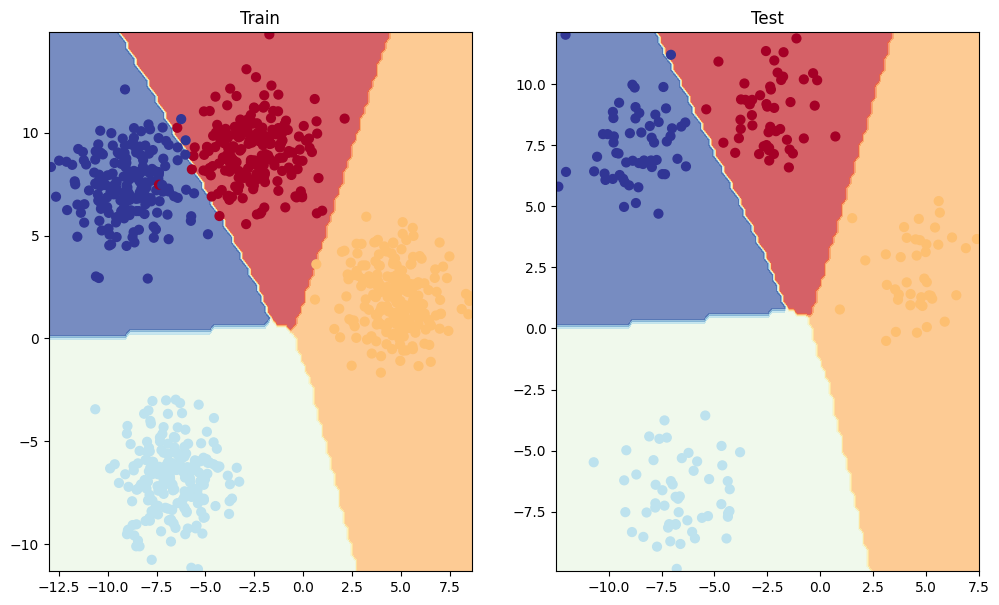

In [38]:
#plotting
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(multiclassmodel,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(multiclassmodel,X_blob_test,y_blob_test)

In [42]:
#create some random data and see how the model perform on that datasets
NUM_SAMPLES = 500
NUM_CLASSES = 4
NUM_FEATURES =2


New_X_blob,new_y_blob = make_blobs(n_samples=NUM_SAMPLES,
                                   centers=NUM_CLASSES,
                                   n_features=NUM_FEATURES,
                                   cluster_std=2.7)

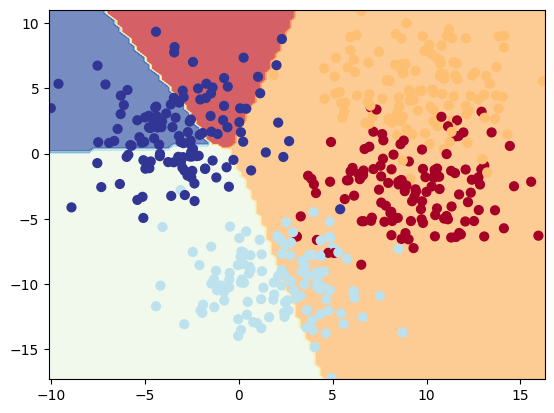

In [48]:
plot_decision_boundary(multiclassmodel,New_X_blob,new_y_blob)

In [46]:
New_X_blob = torch.tensor(New_X_blob,dtype = torch.float32)
new_y_blob = torch.tensor(new_y_blob,dtype = torch.float32)

In [47]:
New_X_blob.dtype,new_y_blob.dtype

(torch.float32, torch.float32)

In [49]:
#testing loop
with torch.inference_mode():
  new_pred = multiclassmodel(New_X_blob)
new_pred

tensor([[ -1.9385,  13.3314,  -0.5666,  -8.4021],
        [  2.0686,  24.4813,  -4.3731, -18.1940],
        [ -2.7840,   6.2732,   4.2293,  -5.1093],
        ...,
        [ -0.2775,   5.0906,  -0.4689,  -3.4727],
        [  2.0106,  -7.5903,  -0.3867,   8.1975],
        [ -1.8416,   4.4794,   2.8167,  -3.6487]])

In [55]:
predict_label =torch.argmax(torch.softmax(new_pred,dim=1),dim=1)

In [54]:
new_y_blob

tensor([0., 1., 2., 0., 3., 2., 2., 3., 3., 2., 1., 0., 1., 3., 0., 0., 0., 1.,
        0., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 2., 3., 2., 3., 3.,
        0., 2., 1., 2., 3., 1., 2., 1., 1., 2., 3., 0., 3., 2., 0., 1., 3., 2.,
        0., 2., 2., 1., 2., 3., 0., 3., 2., 3., 0., 2., 0., 2., 1., 2., 1., 0.,
        2., 3., 1., 3., 1., 2., 3., 3., 1., 1., 3., 2., 1., 2., 1., 2., 3., 3.,
        3., 3., 0., 1., 2., 3., 0., 3., 3., 0., 1., 1., 0., 1., 0., 3., 1., 0.,
        0., 1., 1., 0., 0., 1., 2., 2., 3., 2., 3., 3., 1., 0., 2., 1., 0., 0.,
        3., 0., 1., 0., 1., 2., 1., 0., 0., 1., 3., 1., 1., 0., 1., 1., 0., 0.,
        2., 1., 3., 2., 2., 0., 1., 3., 1., 0., 2., 0., 0., 3., 3., 2., 2., 0.,
        1., 0., 3., 0., 0., 1., 0., 0., 1., 3., 1., 0., 3., 3., 3., 1., 3., 1.,
        0., 1., 3., 0., 0., 2., 3., 2., 1., 2., 0., 3., 1., 1., 1., 2., 1., 2.,
        1., 1., 1., 0., 0., 3., 3., 3., 2., 0., 1., 0., 3., 2., 1., 1., 2., 3.,
        0., 1., 2., 3., 2., 0., 3., 3., 

In [56]:
accuracy = accuracy_fn(new_y_blob,predict_label)


In [57]:
accuracy

47.0